In [1]:
#!pip install keras
#!pip install tensorflow

In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
path_train = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013train-A.txt'
path_test = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013test-A.txt'
path_valid = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013dev-A.txt'

In [4]:
df_train = pd.read_csv(path_train,names=['id','polarity','text'],sep='\t')
df_valid = pd.read_csv(path_valid,names=['id','polarity','text'],sep='\t')
df_test = pd.read_csv(path_test,names=['id','polarity','text'],sep='\t')

In [5]:
df_test

,id,polarity,text
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f..."
...,...,...,...
3542,264233437060288512,negative,Khaleda Zia's present India visit may have a b...
3543,263779058284904448,neutral,"FYI, golf fans: @jameslepp will join Moj on We..."
3544,250744453831213056,negative,@__Aniko you think mr.Calle let practice with ...
3545,258679974591090688,positive,Don't hide under your desk! It's just a salsa ...


In [6]:
print(f'Train size {df_train.shape}')
print(f'Valid size {df_valid.shape}')
print(f'Test size {df_test.shape}')

Train size (9684, 3)
Valid size (1654, 3)
Test size (3547, 3)


In [7]:
df_train = df_train.drop(labels=['id'],axis=1)
df_valid = df_valid.drop(labels=['id'],axis=1)
df_test = df_test.drop(labels=['id'],axis=1)

In [8]:
vectorizer = TfidfVectorizer(norm=None,lowercase=True,stop_words="english",max_df=0.95,min_df=2)

vectorizer.fit(df_train['text'])

tfidf_train = vectorizer.transform(df_train['text']).toarray()
tfidf_valid = vectorizer.transform(df_valid['text']).toarray()
tfidf_test = vectorizer.transform(df_test['text']).toarray()

In [9]:
df_train['polarity'] = pd.Categorical(df_train['polarity'])
y_train_int = df_train['polarity'].cat.codes

df_valid['polarity'] = pd.Categorical(df_valid['polarity'])
y_valid_int = df_valid['polarity'].cat.codes

df_test['polarity'] = pd.Categorical(df_test['polarity'])
y_test_int = df_test['polarity'].cat.codes

In [10]:
y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

In [11]:
X_train = tfidf_train
X_valid = tfidf_valid
X_test = tfidf_test

In [12]:
N = tfidf_train.shape[0]
vocab_size = tfidf_train.shape[1]
print(f'Quantidade de instancias de treinamento {N} e tamanho do vocabulario {vocab_size}')

Quantidade de instancias de treinamento 9684 e tamanho do vocabulario 7654


Arquitetura da Rede Multilayer Perceptron Profunda

Hyperparâmetros da rede

In [13]:
number_of_neurons_layer1 = 20
number_of_neurons_layer2 = 10
number_of_neurons_output = 3
lr = 0.01

In [14]:
model = Sequential()
# Input Layer
model.add(Dense(number_of_neurons_layer1,input_dim=vocab_size,activation='sigmoid'))
model.add(Dense(number_of_neurons_layer2,activation='sigmoid'))
model.add(Dense(number_of_neurons_output,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                153100    
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 153,343
Trainable params: 153,343
Non-trainable params: 0
_________________________________________________________________


In [15]:
sgd = SGD(learning_rate=lr)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
303/303 [==============================] - 2s 6ms/step - loss: 1.0338 - accuracy: 0.4379 - val_loss: 1.0576 - val_accuracy: 0.4468
Epoch 2/50
303/303 [==============================] - 2s 7ms/step - loss: 1.0039 - accuracy: 0.4736 - val_loss: 1.0593 - val_accuracy: 0.4468
Epoch 3/50
303/303 [==============================] - 2s 7ms/step - loss: 1.0013 - accuracy: 0.4736 - val_loss: 1.0583 - val_accuracy: 0.4468
Epoch 4/50
303/303 [==============================] - 2s 5ms/step - loss: 0.9987 - accuracy: 0.4737 - val_loss: 1.0546 - val_accuracy: 0.4468
Epoch 5/50
303/303 [==============================] - 2s 6ms/step - loss: 0.9959 - accuracy: 0.4740 - val_loss: 1.0540 - val_accuracy: 0.4468
Epoch 6/50
303/303 [==============================] - 2s 5ms/step - loss: 0.9928 - accuracy: 0.4752 - val_loss: 1.0520 - val_accuracy: 0.4577
Epoch 7/50
303/303 [==============================] - 2s 6ms/step - loss: 0.9893 - accuracy: 0.4802 - val_loss: 1.0502 - val_accuracy: 0.4704
Epoch 

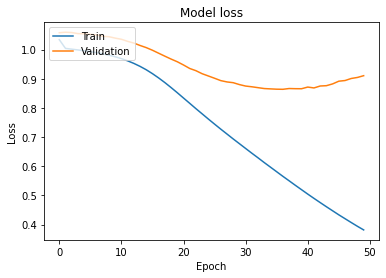

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

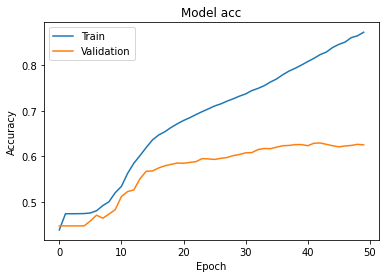

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Avaliação com os Dados de Teste

In [19]:
y = model.evaluate(X_test,y_test)

111/111 [==============================] - 0s 2ms/step - loss: 0.8977 - accuracy: 0.6360


In [20]:
import numpy as np
y_prob = model.predict(X_test)
y_prob

array([[0.06621065, 0.10602306, 0.82776624],
       [0.01593455, 0.00639873, 0.9776667 ],
       [0.0593553 , 0.8794902 , 0.06115455],
       ...,
       [0.23852603, 0.5295865 , 0.23188747],
       [0.12566207, 0.07183804, 0.80249995],
       [0.15676989, 0.6053037 , 0.23792641]], dtype=float32)

In [21]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [22]:
y_test_int

0       2
1       2
2       1
3       0
4       1
       ..
3542    0
3543    1
3544    0
3545    2
3546    1
Length: 3547, dtype: int8

#Atividade 5
# Vitor Vasconcelos de Oliveira  --  180114778

# Calculando Matriz de Confusão:

In [54]:
matriz_conf = [[0,0,0],[0,0,0],[0,0,0]]

for i in range(len(y_pred)):
  matriz_conf[y_test_int[i]][y_pred[i]]+=1

In [55]:
#printando Matriz
for i in range(len(matriz_conf)):
  print(matriz_conf[i])

[93, 357, 109]
[14, 1242, 257]
[24, 530, 921]


# Report do sklearn para compartivo:

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test_int, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.17      0.27       559
           1       0.58      0.82      0.68      1513
           2       0.72      0.62      0.67      1475

    accuracy                           0.64      3547
   macro avg       0.67      0.54      0.54      3547
weighted avg       0.66      0.64      0.61      3547



# Calculando Acurácia:

In [57]:
acr = (matriz_conf[0][0]+matriz_conf[1][1]+matriz_conf[2][2])/len(y_pred)
acr

0.6360304482661404

# Calculando Precisão(pr), Recall(rv) e F1 Score(f1):

In [58]:
#     0   1   2
#  0  *
#  1      *
#  2          *

pr_0 = matriz_conf[0][0]/(matriz_conf[0][0]+matriz_conf[1][0]+matriz_conf[2][0])
rv_0 = matriz_conf[0][0]/(matriz_conf[0][0]+matriz_conf[0][1]+matriz_conf[0][2])
f1_0 = 2*((pr_0*rv_0)/(pr_0+rv_0))

pr_1 = matriz_conf[1][1]/(matriz_conf[1][1]+matriz_conf[0][1]+matriz_conf[2][1])
rv_1 = matriz_conf[1][1]/(matriz_conf[1][1]+matriz_conf[1][0]+matriz_conf[1][2])
f1_1 = 2*((pr_1*rv_1)/(pr_1+rv_1))

pr_2 = matriz_conf[2][2]/(matriz_conf[2][2]+matriz_conf[1][2]+matriz_conf[0][2])
rv_2 = matriz_conf[2][2]/(matriz_conf[2][2]+matriz_conf[2][0]+matriz_conf[2][1])
f1_2 = 2*((pr_2*rv_2)/(pr_2+rv_2))

In [59]:
#Comparando com o classification Report:
# precision  |  recall   |  f1-score
# 0.71       |  0.17     |  0.27

print('precision          | recall              | f1-score')
print(pr_0,'|',rv_0,'|',f1_0)

precision          | recall              | f1-score
0.7099236641221374 | 0.16636851520572452 | 0.26956521739130435


In [60]:
#Comparando com o classification Report:
# precision  |  recall   |  f1-score
# 0.58       |  0.82     |  0.68

print('precision          | recall           | f1-score')
print(pr_1,'|',rv_1,'|',f1_1)

precision          | recall           | f1-score
0.5833724753405355 | 0.82088565763384 | 0.6820428336079077


In [61]:
#Comparando com o classification Report:
# precision  |  recall   |  f1-score
# 0.72       |  0.62     |  0.67

print('precision          | recall            | f1-score')
print(pr_2,'|',rv_2,'|',f1_2)

precision          | recall            | f1-score
0.7156177156177156 | 0.624406779661017 | 0.6669080376538741
